# Полиномиальные модели

# Методические указания


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv", index_col=0)

In [4]:
data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


In [5]:
X = data.x
y = data.y

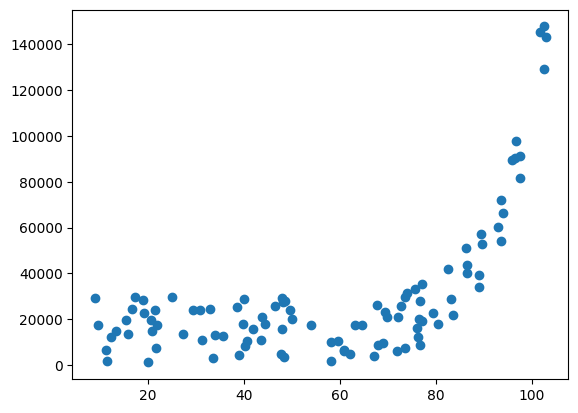

In [6]:
plt.scatter(X, y)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


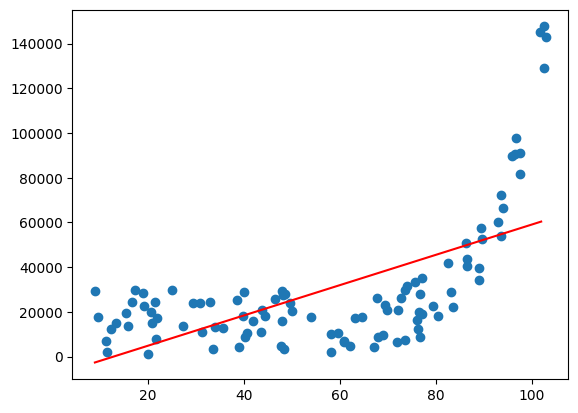

In [7]:
from sklearn.linear_model import LinearRegression


X = pd.DataFrame(X)

linear = LinearRegression().fit(X, y)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

plt.scatter(X.x, y)
plt.plot(xx, yy, c='r')

In [8]:
linear.score(X, y)

0.37467360318911636

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


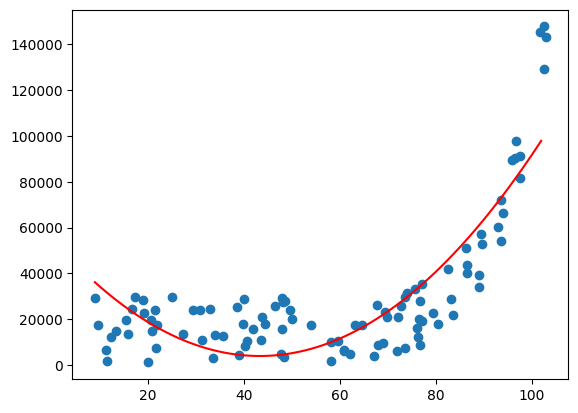

In [9]:
from sklearn.preprocessing import PolynomialFeatures


transformation = PolynomialFeatures(degree=2)
transformation.fit(X)
X_2 = transformation.transform(X)

poly_2d = LinearRegression().fit(X_2, y)

xx_2d = transformation.transform(pd.DataFrame(xx))

yy_2d = poly_2d.predict(xx_2d)
plt.scatter(X.x, y)
plt.plot(xx, yy_2d, c='r')

In [10]:
poly_2d.score(X_2, y)

0.7359753787024842

In [11]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)

In [12]:
y = data.y
X = data.drop(["y"], axis=1)

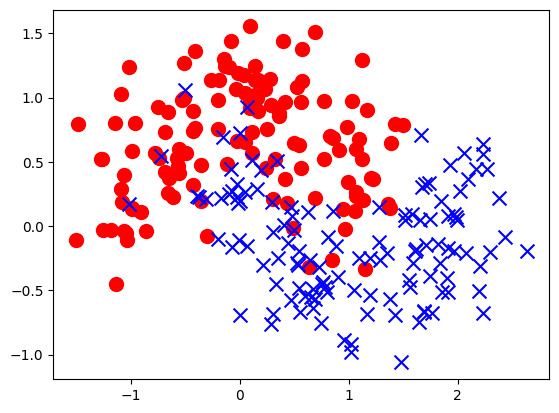

In [13]:
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


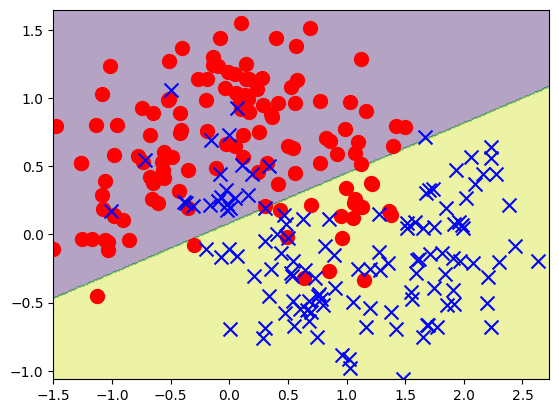

In [14]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression().fit(X, y)

xx, yy = np.meshgrid(
    np.arange(X.min()[0], X.max()[0]+0.1, 0.01),
    np.arange(X.min()[1], X.max()[1]+0.1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))

Z = logistic.predict(XX).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [15]:
logistic.score(X, y)

0.832

/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


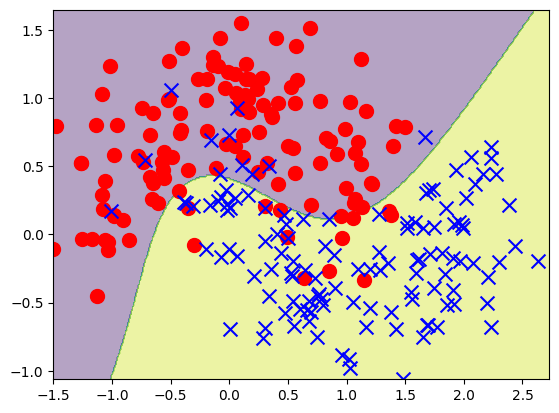

In [16]:
class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)

class_3 = LogisticRegression().fit(X_3, y)

Z = class_3.predict(class_transform.transform(XX)).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X.iloc[:, 0][y==0], X.iloc[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X.iloc[:, 0][y==1], X.iloc[:, 1][y==1], marker="x", c='b', s=100)

In [17]:
class_3.score(X_3, y)

0.9

In [18]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

(21613, 21)

In [19]:
data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [20]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

X_kc_prices.shape, y_kc_prices.shape

((21613, 18), (21613,))

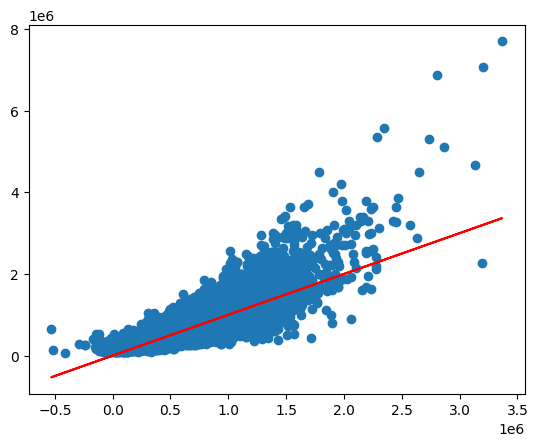

In [21]:
reg_kc_multiple = LinearRegression().fit(X_kc_prices, y_kc_prices)
reg_kc_multiple.score(X_kc_prices, y_kc_prices)

y_pred_kc_prices = reg_kc_multiple.predict(X_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

In [22]:
X_3_kc_prices = (poly_features_kc_prices := PolynomialFeatures(degree=3)).fit_transform(X_kc_prices)
X_3_kc_prices.shape

(21613, 1330)

In [23]:
reg_poly2_kc = LinearRegression().fit(X_3_kc_prices, y_kc_prices)
reg_poly2_kc.score(X_3_kc_prices, y_kc_prices)

0.8646277017956683

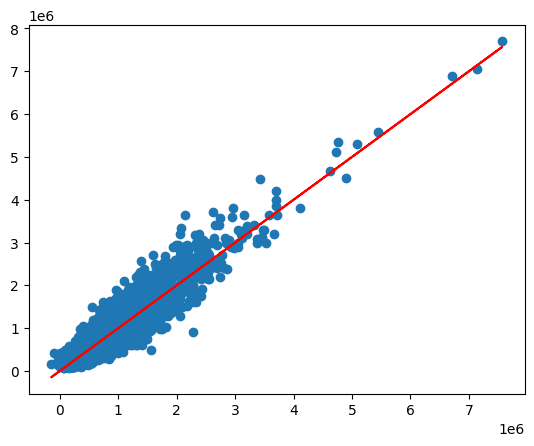

In [24]:
y_pred_kc_prices = reg_poly2_kc.predict(X_3_kc_prices)
plt.scatter(y_pred_kc_prices, y_kc_prices)
plt.plot(y_pred_kc_prices, y_pred_kc_prices, c='r')

# Задание для самостоятельного выполнения

### 1. В выполненной работе добавьте замер времени обучения каждой модели.

In [25]:
import time
from sklearn.linear_model import LinearRegression


def average_fit_time(model, X, y, repeats=10):
    times = []
    for _ in range(repeats):
        start = time.time()
        model.fit(X, y)
        end = time.time()
        times.append(end - start)
    return np.mean(times)


lin_time = average_fit_time(LinearRegression(), X, y)

from sklearn.preprocessing import PolynomialFeatures
transformation = PolynomialFeatures(degree=2)
X_2 = transformation.fit_transform(X)
poly_time = average_fit_time(LinearRegression(), X_2, y)

from sklearn.linear_model import LogisticRegression
log_time = average_fit_time(LogisticRegression(), X, y)

class_transform = PolynomialFeatures(degree=3, include_bias=False)
X_3 = class_transform.fit_transform(X)
poly_log_time = average_fit_time(LogisticRegression(), X_3, y)


print(f"Среднее время обучения линейной регрессии: {lin_time:.6f} сек")
print(f"Среднее время обучения полинрмиальной регрессии (Степень 2): {poly_time:.6f} сек")
print(f"Среднее время обучения логистической регрессии: {log_time:.6f} сек")
print(f"Среднее время обучения полиермиальной логистической регрессии (Степень 3): {poly_log_time:.6f} сек")

Среднее время обучения линейной регрессии: 0.001017 сек
Среднее время обучения полинрмиальной регрессии (Степень 2): 0.000303 сек
Среднее время обучения логистической регрессии: 0.001115 сек
Среднее время обучения полиермиальной логистической регрессии (Степень 3): 0.001206 сек


### 2. На датасете "gen_regression" постройте модель пятого, десятого и сотого порядков. Сравните эффективность и время обучения каждой модели.

In [26]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML3.1%20polynomial%20features/data/gen_regression.csv", index_col=0)
y = data.y
X = data.drop(["y"], axis=1)

data.head()

,x,y
0,96.597780,97761.592016
1,48.002892,27613.989207
2,47.939756,29410.187753
3,47.809026,15789.597531
4,69.784427,20953.383453


Среднее время обучения полиномиальной регрессии (Степень 5): 0.001498 сек
Среднее время обучения полиномиальной регрессии (Степень 10): 0.000580 сек
Среднее время обучения полиномиальной регрессии (Степень 100): 0.001228 сек
R² (степень 5): 0.9217
R² (степень 10): 0.9232
R² (степень 100): 0.7925


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


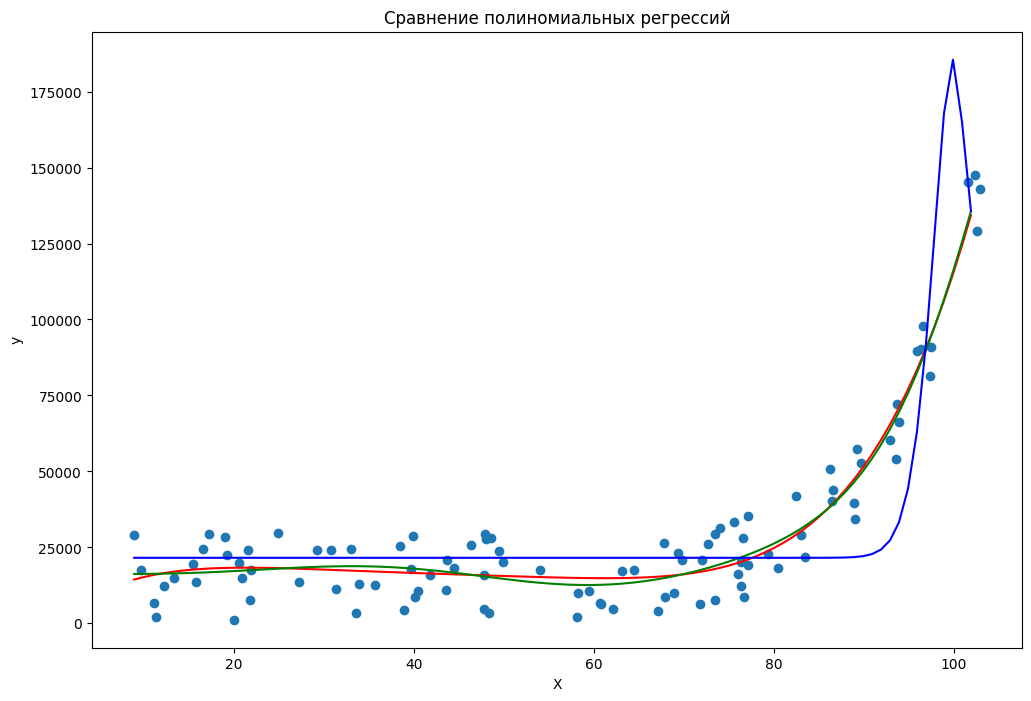

In [27]:
import time
from sklearn.linear_model import LinearRegression

def average_fit_time(model, X, y, repeats=1):
    times = []
    for _ in range(repeats):
        start = time.time()
        model.fit(X, y)
        end = time.time()
        times.append(end - start)
    return np.mean(times)

from sklearn.preprocessing import PolynomialFeatures
transformation_5d = PolynomialFeatures(degree=5)
X_5 = transformation_5d.fit_transform(X)
poly_time_5d = average_fit_time(LinearRegression(), X_5, y)

transformation_10d = PolynomialFeatures(degree=10)
X_10 = transformation_10d.fit_transform(X)
poly_time_10d = average_fit_time(LinearRegression(), X_10, y)

transformation_100d = PolynomialFeatures(degree=100)
X_100 = transformation_100d.fit_transform(X)
poly_time_100d = average_fit_time(LinearRegression(), X_100, y)


print(f"Среднее время обучения полиномиальной регрессии (Степень 5): {poly_time_5d:.6f} сек")
print(f"Среднее время обучения полиномиальной регрессии (Степень 10): {poly_time_10d:.6f} сек")
print(f"Среднее время обучения полиномиальной регрессии (Степень 100): {poly_time_100d:.6f} сек")


from sklearn.metrics import r2_score

r2_5 = r2_score(y, LinearRegression().fit(X_5, y).predict(X_5))
r2_10 = r2_score(y, LinearRegression().fit(X_10, y).predict(X_10))
r2_100 = r2_score(y, LinearRegression().fit(X_100, y).predict(X_100))

print(f"R² (степень 5): {r2_5:.4f}")
print(f"R² (степень 10): {r2_10:.4f}")
print(f"R² (степень 100): {r2_100:.4f}")

X = pd.DataFrame(X)

xx = np.arange(X.x.min(axis=0), X.x.max(axis=0))
yy = linear.predict(pd.DataFrame(xx))

# Визуализация результатов
plt.figure(figsize=(12, 8))

poly_5d = LinearRegression().fit(X_5, y)
xx_5d = transformation_5d.transform(pd.DataFrame(xx))
yy_5d = poly_5d.predict(xx_5d)
plt.scatter(X.x, y)
plt.plot(xx, yy_5d, c='r')

poly_10d = LinearRegression().fit(X_10, y)
xx_10d = transformation_10d.transform(pd.DataFrame(xx))
yy_10d = poly_10d.predict(xx_10d)
plt.plot(xx, yy_10d, c='g')

poly_100d = LinearRegression().fit(X_100, y)
xx_100d = transformation_100d.transform(pd.DataFrame(xx))
yy_100d = poly_100d.predict(xx_100d)
plt.plot(xx, yy_100d, c='b')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Сравнение полиномиальных регрессий')
plt.show()

### 3. То же самое проделайте с датасетом для классификации и "King county".

In [28]:
data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")
data_kc_prices.shape

data_kc_prices.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [29]:
y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

y_kc_prices.shape, X_kc_prices.shape

((21613,), (21613, 18))

In [30]:
import time
from sklearn.linear_model import LinearRegression

def average_fit_time(model, X, y, repeats=1):
    times = []
    for _ in range(repeats):
        start = time.time()
        model.fit(X[:1000], y[:1000])
        end = time.time()
        times.append(end - start)
    return np.mean(times)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_standardized = scaler_X.fit_transform(X_kc_prices)

from sklearn.preprocessing import PolynomialFeatures

transformation_5d = PolynomialFeatures(degree=5)
X_5 = transformation_5d.fit_transform(X_standardized)
poly_time_5d = average_fit_time(LinearRegression(), X_5, y_kc_prices)

print(f"Среднее время обучения полиномиальной регрессии (Степень 5): {poly_time_5d:.6f} сек")

from sklearn.metrics import r2_score

r2_5 = r2_score(y_kc_prices[:100], LinearRegression().fit(X_5[:100], y_kc_prices[:100]).predict(X_5[:100]))

print(f"R² (степень 5): {r2_5:.4f}")

Среднее время обучения полиномиальной регрессии (Степень 5): 1.731519 сек
R² (степень 5): 0.9960


Для данного датасета не получается обучить модель даже 5ого порядка (Не хватает оперативной памяти)

Поэтому количество наблюдений было сокращено до 1000

In [31]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/gen_classification.csv",
                   index_col=0)
y = data.y
X = data.drop(["y"], axis=1)


In [32]:
import time
from sklearn.linear_model import LogisticRegression

def average_fit_time(model, X, y, repeats=1):
    times = []
    for _ in range(repeats):
        start = time.time()
        model.fit(X, y)
        end = time.time()
        times.append(end - start)
    return np.mean(times)

from sklearn.preprocessing import StandardScaler

scaler_X = StandardScaler()

X_standardized = scaler_X.fit_transform(X)

from sklearn.preprocessing import PolynomialFeatures
transformation_5d = PolynomialFeatures(degree=5)
X_5 = transformation_5d.fit_transform(X)
poly_time_5d_log = average_fit_time(LogisticRegression(), X_5, y)

transformation_10d = PolynomialFeatures(degree=10)
X_10 = transformation_10d.fit_transform(X)
poly_time_10d_log = average_fit_time(LogisticRegression(), X_10, y)

transformation_100d = PolynomialFeatures(degree=100)
X_100 = transformation_100d.fit_transform(X)
poly_time_100d_log = average_fit_time(LogisticRegression(), X_100, y)


print(f"Среднее время обучения полиномиальной регрессии (Степень 5): {poly_time_5d:.6f} сек")
print(f"Среднее время обучения полиномиальной регрессии (Степень 10): {poly_time_10d:.6f} сек")
print(f"Среднее время обучения полиномиальной регрессии (Степень 100): {poly_time_100d:.6f} сек")


from sklearn.metrics import log_loss

y_prob_5 = LogisticRegression().fit(X_5, y).predict_proba(X_5)
y_prob_10 = LogisticRegression().fit(X_10, y).predict_proba(X_10)
y_prob_100 = LogisticRegression().fit(X_100, y).predict_proba(X_100)

# Вычисление логарифмической потери (log_loss)
log_loss_5 = log_loss(y, y_prob_5)
log_loss_10 = log_loss(y, y_prob_10)
log_loss_100 = log_loss(y, y_prob_100)

# Вывод результатов
print(f"Log Loss (степень 5): {log_loss_5:.4f}")
print(f"Log Loss (степень 10): {log_loss_10:.4f}")
print(f"Log Loss (степень 100): {log_loss_100:.4f}")

Среднее время обучения полиномиальной регрессии (Степень 5): 1.731519 сек
Среднее время обучения полиномиальной регрессии (Степень 10): 0.000580 сек
Среднее время обучения полиномиальной регрессии (Степень 100): 0.001228 сек
Log Loss (степень 5): 0.2477
Log Loss (степень 10): 0.2388
Log Loss (степень 100): 0.6931


/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/evgeniilaz/Python/Stepik/venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

### 4. Составьте таблицу эффективности разных моделей для каждой задачи. В таблице должна быть информация о времени обучения модели и получившейся точности. Сделайте вывод о целесообразности применения разных степеней полиномов.

In [33]:
results = {
    'Degree': [5, 10, 100],
    'Logistic Regression Time (sec)': [poly_time_5d_log, poly_time_10d_log, poly_time_100d_log],
    'Logistic Regression Log Loss': [log_loss_5, log_loss_10, log_loss_100],
    'Linear Regression Time (sec)': [poly_time_5d, poly_time_10d, poly_time_100d],
    'Linear Regression R²': [r2_5, r2_10, r2_100]
}

results_df = pd.DataFrame(results)

results_df

,Degree,Logistic Regression Time (sec),Logistic Regression Log Loss,Linear Regression Time (sec),Linear Regression R²
0,5,0.002742,0.247656,1.731519,0.996029
1,10,0.011335,0.238776,0.000580,0.923200
2,100,0.006828,0.693147,0.001228,0.792462


Слишком высокая степень полинома привод к переобучению модели, плюс требует много ресурсов и времени для рассчета

### 5. Для линейной модели в задаче о продаже домов выведите коэффициенты модели и названия соответствующих атрибутов. Сделайте вывод об относительной важности атрибутов.

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X_kc_prices)

model= LinearRegression()
model.fit(X_standardized, y_kc_prices)

coefficients = model.coef_

feature_names = X_kc_prices.columns

# Составление таблицы коэффициентов и атрибутов
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

coefficients_df

,Feature,Coefficient
0,bedrooms,-33264.325458
1,bathrooms,31687.074375
2,sqft_living,81812.507110
3,sqft_lot,5326.466291
4,floors,3612.199207
5,waterfront,50434.938435
6,view,40514.994738
7,condition,17169.880475
8,grade,112712.655853
9,sqft_above,76305.519976


Чем больше абсолютное значение коэффициента, тем сильнее влияние данного признака на результат модели.

### 6. Попробуйте также проинтерпретировать полиномиальную модель.

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import matplotlib.pyplot as plt

data_kc_prices = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML3.1%20polynomial%20features/kc_house_data.csv")

y_kc_prices = data_kc_prices.price
X_kc_prices = data_kc_prices.drop(["id", "date", "price"], axis=1)

scaler_X = StandardScaler()
X_standardized = scaler_X.fit_transform(X_kc_prices)

transformation_3d = PolynomialFeatures(degree=3)
X_3 = transformation_3d.fit_transform(X_standardized)

model_3d = LinearRegression()
model_3d.fit(X_3, y_kc_prices)

coefficients = model_3d.coef_

feature_names = transformation_3d.get_feature_names_out(X_kc_prices.columns)

coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})


coefficients_df


,Feature,Coefficient
0,1,-4.266289e+09
1,bedrooms,-7.434636e+11
2,bathrooms,8.866576e+11
3,sqft_living,-6.707820e+11
4,sqft_lot,-2.250825e+11
...,...,...
1325,long sqft_lot15^2,9.288940e+00
1326,sqft_living15^3,2.136936e+03
1327,sqft_living15^2 sqft_lot15,-1.288554e+03
1328,sqft_living15 sqft_lot15^2,-1.674545e+03


# Контрольные вопросы

**1. В чем заключается суть метода множественной регрессии?**  
Метод множественной регрессии оценивает зависимость целевой переменной от нескольких независимых переменных с помощью линейного уравнения.

**2. Какие основные недостатки применения полиномиальных признаков на практике?**  
Переобучение, рост вычислительных затрат, ухудшение интерпретируемости модели.

**3. В каких случаях введение полиномиальных признаков может быть полезным?**  
Когда зависимость между признаками и целевой переменной носит нелинейный характер.

**4. Как растет требование к объему оперативной памяти при введении полиномиальных признаков?**  
Экспоненциально по числу признаков и степени полинома.

**5. Почему при введении полиномиальных признаков нужно добавить все комбинации атрибутов до заданной степени?**  
Чтобы модель могла уловить все возможные взаимодействия между признаками.

**6. Почему на последнем графике линия получается прямая, хотя мы используем нелинейную модель?**  
Потому что признаки были полиномиально преобразованы, а модель линейна по коэффициентам — итоговая зависимость визуально может быть линейной.
